In [1]:
# Import required libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import kagglehub
jessicali9530_celeba_dataset_path = kagglehub.dataset_download('jessicali9530/celeba-dataset')

print('Data source import complete.')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D

100%|██████████| 1.33G/1.33G [00:16<00:00, 85.6MB/s]

Extracting files...


Data source import complete.


In [2]:
BASIC_PATH = jessicali9530_celeba_dataset_path
IMG_PATH = os.path.join(BASIC_PATH,'img_align_celeba/img_align_celeba')
FEATURE_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')


In [3]:
LIST_ATTR_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')
DF_ATTR = pd.read_csv(BASIC_PATH + '/list_attr_celeba.csv', delimiter=',')
print(IMG_PATH, LIST_ATTR_PATH)
DF_ATTR.head()

/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [4]:
DF_PARTITION = pd.read_csv(BASIC_PATH + '/list_eval_partition.csv')

In [5]:
DF_ATTR.set_index('image_id', inplace=True)
DF_ATTR.replace(to_replace=-1, value=0, inplace=True)
DF_ATTR.shape

(202599, 40)

In [6]:
DF_PARTITION['partition'].value_counts().sort_index()

,count
partition,
0,162770
1,19867
2,19962


In [7]:
n_images = len(os.listdir(IMG_PATH))
print("Total Images in the Dataset: ", n_images)

Total Images in the Dataset:  202599


Contoh file duplikat:
051617.jpg
105305.jpg
122263.jpg
082741.jpg
132115.jpg
136698.jpg
165623.jpg
181968.jpg
Total file duplikat: 131


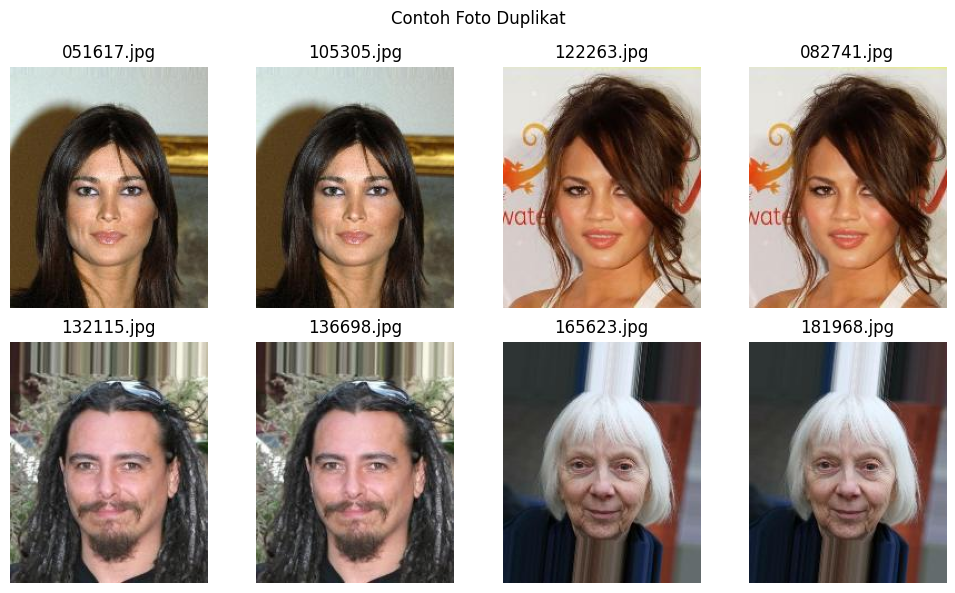

In [8]:
# Mengecek File Duplikat, Menghitung Jumlahnya dan Menampilkan 5 File Contoh
import hashlib
# Library yang digunakan : os dan hashlib

# Mencari semua file dengan ekstensi gambar dalam folder
image_files = [file for file in os.listdir(IMG_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Menggunakan dictionary untuk menyimpan hash nilai dan daftar file dengan hash yang sama
duplicate_files = {}

# Memeriksa setiap file gambar
for file_name in image_files:
    file_path = os.path.join(IMG_PATH, file_name)
    with open(file_path, 'rb') as f:
        file_hash = hashlib.md5(f.read()).hexdigest()

    if file_hash not in duplicate_files:
        duplicate_files[file_hash] = [file_name]
    else:
        duplicate_files[file_hash].append(file_name)

# Menghitung total file yang duplikat
total_duplicate_files = sum(len(files) - 1 for files in duplicate_files.values())

# Menampilkan 8 contoh nama file yang duplikat
print("Contoh file duplikat:")
count = 0
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        for file_name in file_list[:8]:
            count += 1
            print(file_name)
            if count == 8:
                break
    if count == 8:
        break

# Menampilkan total file yang duplikat
print(f"Total file duplikat: {total_duplicate_files}")

# Mengumpulkan 8 contoh file duplikat
duplicate_examples = []
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        duplicate_examples.extend(file_list[:8])
    if len(duplicate_examples) >= 10:
        break

# Menampilkan 8 foto duplikat dengan judul sebagai nama file
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(duplicate_examples):
        file_name = duplicate_examples[i]
        file_path = os.path.join(IMG_PATH, file_name)
        image = plt.imread(file_path)
        ax.imshow(image)
        ax.set_title(file_name)
        plt.suptitle('Contoh Foto Duplikat')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Code Modif dari Chat GPT

In [9]:
# Membuat List Nama File Foto untuk Join dengan Nama File pada File list_attribute.csv
import glob
# Library yang digunakan : glob dan pandas

# Tentukan pola nama file foto (misal: JPEG, PNG)
file_ekstensi = '*.jpg' # Ganti dengan ekstensi file gambar yang sesuai

# Tentukan direktori tempat file-file gambar berada
direktori_foto = IMG_PATH

# Mendapatkan list nama file
nama_file = glob.glob(direktori_foto + '/' + file_ekstensi)

# List nama file dijadikan dataframe
data = pd.DataFrame(nama_file, columns = ['image_id'])

# Menampilkan dataframe
data.head()

# Code Modif dari Chat GPT

,image_id
0,/root/.cache/kagglehub/datasets/jessicali9530/...
1,/root/.cache/kagglehub/datasets/jessicali9530/...
2,/root/.cache/kagglehub/datasets/jessicali9530/...
3,/root/.cache/kagglehub/datasets/jessicali9530/...
4,/root/.cache/kagglehub/datasets/jessicali9530/...


In [10]:
# Membuang karakter pertama hingga sebelum nama file
data['image_id'] = data['image_id'].str.split('\\').str[-1]
data.head()
# Note: menggunakan '\\' karena pemisah antar folder adalah '\'

# Code Modif dari Googling

,image_id
0,/root/.cache/kagglehub/datasets/jessicali9530/...
1,/root/.cache/kagglehub/datasets/jessicali9530/...
2,/root/.cache/kagglehub/datasets/jessicali9530/...
3,/root/.cache/kagglehub/datasets/jessicali9530/...
4,/root/.cache/kagglehub/datasets/jessicali9530/...


In [11]:
# Load Dataset 'list_attribute.csv'
df_attribute = pd.read_csv(LIST_ATTR_PATH)
df_attribute.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [12]:
# Cek Informasi pada DataFrame
df_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [13]:
# Inner Join antara Objek 'data' dengan Objek 'list_attribute'
df_join = pd.merge(data, df_attribute, on = 'image_id', how = 'inner')
df_join.head()

# Code Modif dari Googling

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young


In [14]:
# Cek Jumlah Bari yang telah Join Inner
df_join.shape

(0, 41)

In [15]:
# join the partition with the attributes
DF_PARTITION.set_index('image_id', inplace=True)
DF_PARTITION = DF_PARTITION.join(DF_ATTR['Male'], how='inner')
DF_PARTITION.head()

,partition,Male
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,1
000004.jpg,0,0
000005.jpg,0,0


In [16]:
# Read the attributes csv files in a dataframe format.
df = pd.read_csv(FEATURE_PATH, usecols=['image_id','Male'])
df = df.sample(n=22000, random_state = 42).reset_index(drop=True)

# Reset the columns values to categorical./
df.loc[df['Male'] == -1,'Male'] = "Female"
df.loc[df['Male'] == 1,'Male'] = "Male"

# Change column names.
df.columns = ["image_id", "Gender"]

df.head(10)

<ipython-input-16-2a02771cbc01>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Male'] == -1,'Male'] = "Female"


,image_id,Gender
0,093242.jpg,Male
1,121414.jpg,Female
2,010625.jpg,Male
3,082524.jpg,Female
4,073193.jpg,Female
5,176200.jpg,Female
6,041602.jpg,Female
7,065466.jpg,Male
8,019028.jpg,Male
9,164498.jpg,Female


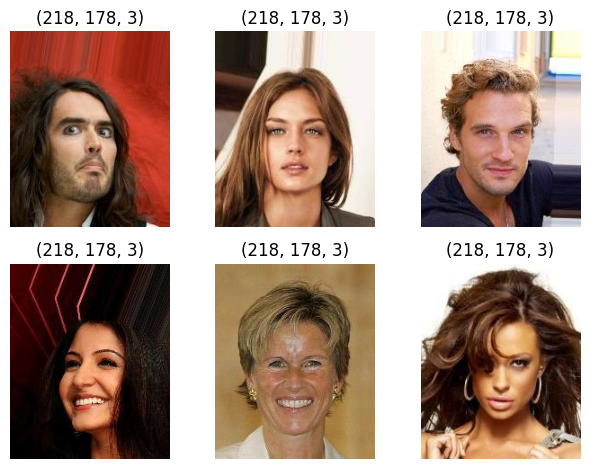

In [17]:
# Display Multiple Sample Images.
for i in range(0, 6):
    plt.subplot(2, 3, i+1)

    # Read an Image.
    img = cv2.imread(IMG_PATH + '/' + df["image_id"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display Image.
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
# Get the category distribution.
category_count = df["Gender"].value_counts()
print(category_count)

higher_category = list(category_count.index)[0]

Gender
Female    12760
Male       9240
Name: count, dtype: int64


In [19]:
# Get the indices of the higher category indices images.
np.random.seed(42)
indices = df[df["Gender"] == higher_category].index
sample_size = category_count[0] - category_count[1]

# Drop the extra rows of female images to fix class imbalance problem.
drop_sample = np.random.choice(indices, sample_size, replace = False)
df = df.drop(drop_sample, axis = "index")

<ipython-input-19-6b82c4730800>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_size = category_count[0] - category_count[1]


<Axes: xlabel='Gender'>

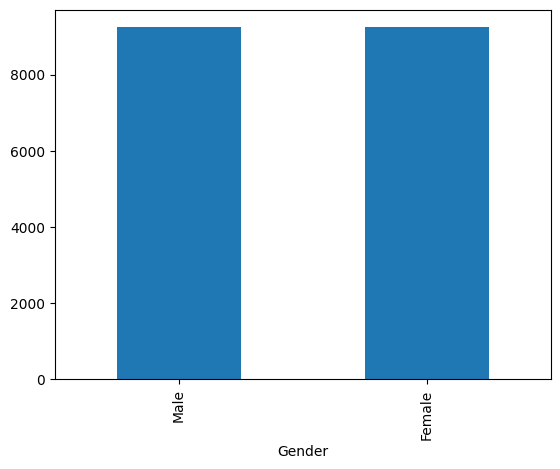

In [20]:
df["Gender"].value_counts().plot.bar()

In [21]:
train_df, test_df = train_test_split(df, test_size=0.3)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

In [22]:
print("Total Train Sample Images : ", len(train_df))
print("Total Test Sample Images : ", len(test_df))
print("Total Validation Sample Images : ", len(validation_df))

Total Train Sample Images :  12936
Total Test Sample Images :  3714
Total Validation Sample Images :  1830


In [23]:
IMAGE_SIZE = (218, 178)
BATCH_SIZE = 128

In [24]:
# Generate Train Images Data Generator.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 12936 validated image filenames belonging to 2 classes.


In [25]:
# Generate Validation Images Data Generator.
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 1830 validated image filenames belonging to 2 classes.


In [26]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 3714 validated image filenames.


In [27]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE + (3,))

for layer in base_model.layers[-5:]: #unfreeze 5 layer terakhir
    layer.trainable = False


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
# Membuat Arsitektur Fully Connected
from keras import Sequential
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

# Membuat Arsitektur Fully Connected
model = Sequential(
    [
    base_model,
    GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation="softmax")
]
)
# Code Modif from Kaggle

# Kompile Model Deep Learning
base_learning_rate = 0.00001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [32]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.001)
callbacks = [earlystop, learning_rate_reduction]

In [33]:
history = model.fit(train_generator, validation_data=validation_generator,
                              validation_steps=len(validation_df)//BATCH_SIZE,
                              steps_per_epoch=len(train_df)//BATCH_SIZE,
                              epochs=10,
                              verbose=1,
                              callbacks=callbacks)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.5977 - loss: 0.6702 - val_accuracy: 0.9007 - val_loss: 0.3259 - learning_rate: 1.0000e-05
Epoch 2/10
  1/101 ━━━━━━━━━━━━━━━━━━━━ 1:01 611ms/step - accuracy: 0.8438 - loss: 0.4625

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8438 - loss: 0.4625 - val_accuracy: 0.9474 - val_loss: 0.2136 - learning_rate: 1.0000e-05
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8411 - loss: 0.4093 - val_accuracy: 0.9263 - val_loss: 0.1987 - learning_rate: 1.0000e-05
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9297 - loss: 0.1917 - val_accuracy: 1.0000 - val_loss: 0.0653 - learning_rate: 1.0000e-05
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9031 - loss: 0.2535 - val_accuracy: 0.9319 - val_loss: 0.1600 - learning_rate: 1.0000e-05
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.9219 - loss: 0.1984 - val_accuracy: 0.9737 - val_loss: 0.1422 - learning_rate: 1.0000e-05
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9287 - loss: 0.1961 - val_accuracy: 0.9431 - val_loss: 0.1352 - learning_rate: 1.0000e-05
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.

In [50]:
# prompt: save the model

# Save the model to your Google Drive
model_path = '/content/drive/My Drive/gender_classification_model_inceptionV3.h5'
model.save(model_path)

print(f"Model saved to: {model_path}")

Model saved to: /content/drive/My Drive/gender_classification_model_inceptionV3.h5


In [34]:
predict = model.predict(test_generator, steps=int(np.ceil(len(test_df) / BATCH_SIZE)))

30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 451ms/step


In [35]:
prediction = predict.argmax(axis=-1)
test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

In [36]:
test_df

,image_id,Gender,Prediction
1932,155041.jpg,Female,Female
4135,111704.jpg,Male,Male
2284,109078.jpg,Male,Male
13202,121187.jpg,Male,Male
14575,108728.jpg,Female,Female
...,...,...,...
17983,041704.jpg,Female,Female
9884,168278.jpg,Male,Male
2728,057113.jpg,Female,Female
9628,164346.jpg,Male,Male


In [37]:
labels = ['Male','Female']

cm = confusion_matrix(test_df['Gender'], test_df["Prediction"], labels= labels)
cm

array([[1739,   96],
       [  58, 1821]])

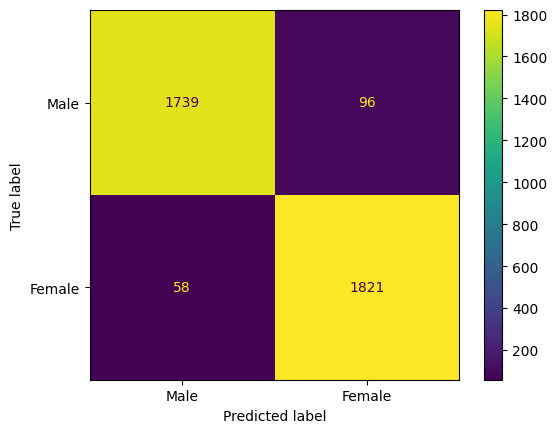

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [39]:
from sklearn.metrics import classification_report
# Menghitung matriks confusion -> pada object 'cm_1' di atas

# Membuat laporan klasifikasi
target_names = ['Male', 'Female']  # Ganti dengan nama kelas yang sesuai
classification_rep = classification_report(test_df['Gender'], test_df['Prediction'],
                                            target_names=target_names, output_dict=True)

# Membuat DataFrame dari matriks confusion
df_confusion = pd.DataFrame(cm, columns=target_names, index=target_names)

# Membuat DataFrame dari laporan klasifikasi
df_classification = pd.DataFrame(classification_rep).transpose()

# Menampilkan tabel matriks evaluasi
print("Confusion Matrix:")
print(df_confusion)
print("\nClassification Report:")
print(df_classification)

# Code Modif from Chat GPT

Confusion Matrix:
        Male  Female
Male    1739      96
Female    58    1821

Classification Report:
              precision    recall  f1-score      support
Male           0.949922  0.969133  0.959431  1879.000000
Female         0.967724  0.947684  0.957599  1835.000000
accuracy       0.958535  0.958535  0.958535     0.958535
macro avg      0.958823  0.958408  0.958515  3714.000000
weighted avg   0.958717  0.958535  0.958526  3714.000000


In [40]:
# Matrix Evaluasi
print(classification_report(test_df['Gender'], test_df['Prediction'], target_names = ['Male', 'Female']))

# Code Modif from Chat GPT

              precision    recall  f1-score   support

        Male       0.95      0.97      0.96      1879
      Female       0.97      0.95      0.96      1835

    accuracy                           0.96      3714
   macro avg       0.96      0.96      0.96      3714
weighted avg       0.96      0.96      0.96      3714



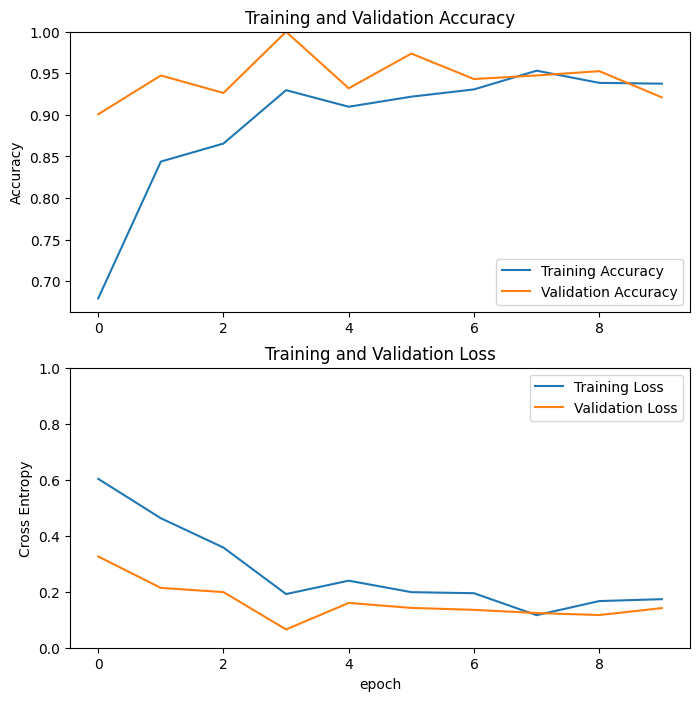

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [42]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_woman_df = wrong_df[wrong_df['Gender'] == 'Male']
wrong_woman_df.head()

,image_id,Gender,Prediction
21156,111135.jpg,Male,Female
15165,133691.jpg,Male,Female
15521,131501.jpg,Male,Female
3077,067232.jpg,Male,Female
21706,067869.jpg,Male,Female


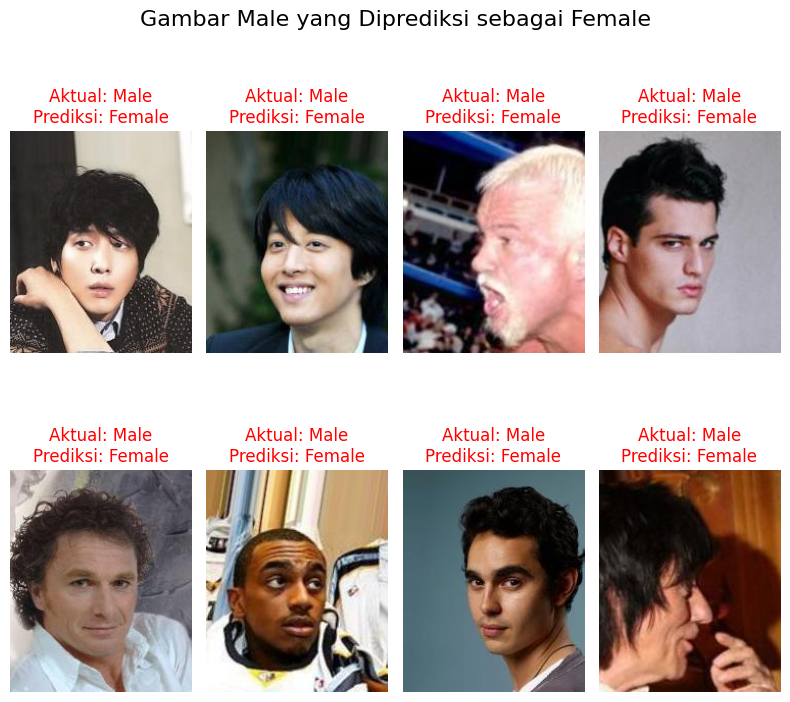

In [43]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_woman_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Male yang Diprediksi sebagai Female", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [44]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_male_df = wrong_df[wrong_df['Gender'] == 'Female']
wrong_male_df.head()

,image_id,Gender,Prediction
8006,086523.jpg,Female,Male
6399,185270.jpg,Female,Male
3940,197909.jpg,Female,Male
2539,104492.jpg,Female,Male
10399,026254.jpg,Female,Male


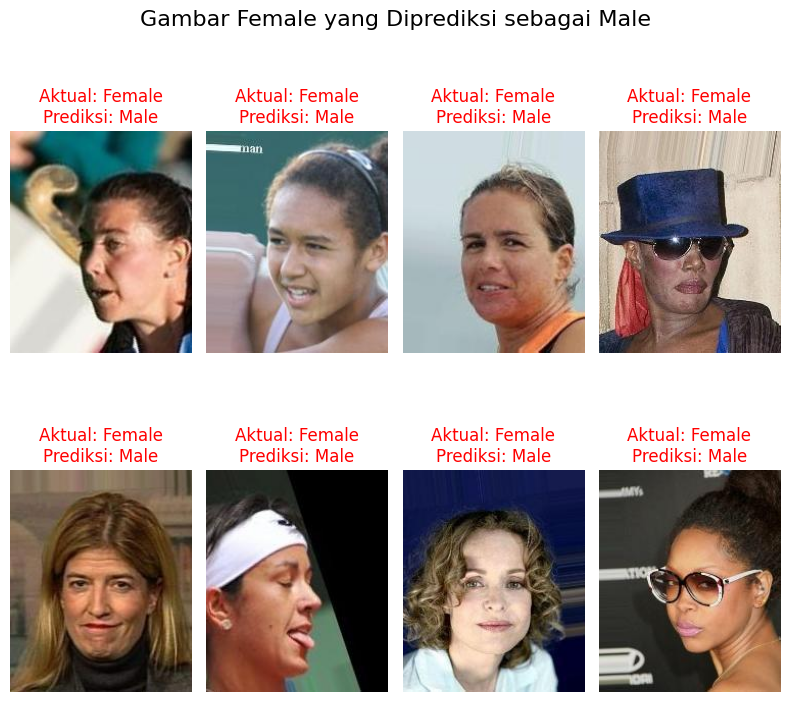

In [45]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_male_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Female yang Diprediksi sebagai Male", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [46]:
from PIL import Image
from io import BytesIO
import base64
from IPython.core.display import display, HTML

gender_target = {0: 'Female', 1: 'Male'}

def img_to_display(filename):
    # inspired on this kernel:
    # https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
    # credits to stassl :)

    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)

    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()


def display_result(filename, prediction, target):
    '''
    Display the results in HTML

    '''

    gender = 'Male'
    gender_icon = "https://i.imgur.com/nxWan2u.png"

    if prediction[1] <= 0.5:
        gender_icon = "https://i.imgur.com/oAAb8rd.png"
        gender = 'Female'

    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <img src="{}" style="float: left;" width="40" height="40">
            <h3 style="margin-left: 50px; margin-top: 2px;">{}</h3> <br>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Real Target: {}</p> <br><br>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , gender_icon
               , gender
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               ,  gender_target[target]
               , filename.split('/')[-1]
               )

    display(HTML(display_html))

In [47]:
def gender_prediction(filename):
    '''
    predict the gender

    input:
        filename: str of the file name

    return:
        array of the prob of the targets.

    '''

    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)

    # prediction
    result = model.predict(im)
    prediction = np.argmax(result)

    return result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step



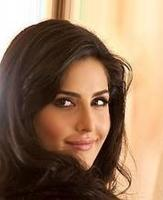

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step



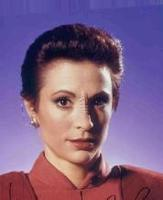

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step



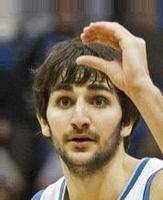

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step



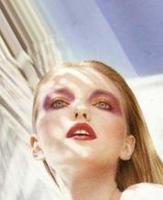

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step



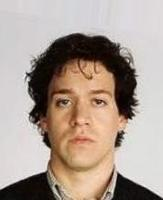

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step



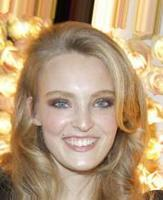

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step



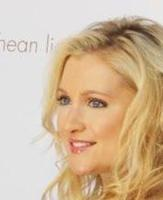

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step



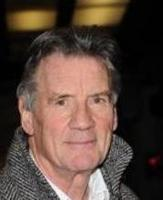

In [49]:
df_to_test = DF_PARTITION[(DF_PARTITION['partition'] == 2)].sample(8)

for index, target in df_to_test.iterrows():
    result = gender_prediction(IMG_PATH +"/"+ index)

    #display result
    display_result(IMG_PATH + "/" + index, result[0], target['Male'])